In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pyreadr
import censusdata
import bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import CustomJS
from bokeh.models import LinearColorMapper
from bokeh.models.tools import HoverTool
from bokeh.models import Dropdown
output_notebook()

Loading BokehJS ...

#### Read in presidential data

In [2]:
result = pyreadr.read_r('data/dataverse_shareable_presidential_county_returns_1868_2020.Rdata')
pres_df = result['pres_elections_release']
pres_df['dem_twoway_pres'] = pres_df.democratic_raw_votes / pres_df.pres_raw_county_vote_totals_two_party

print(pres_df.shape)
pres_df.head()

(113756, 21)


,election_year,fips,county_name,state,sfips,office,election_type,seat_status,democratic_raw_votes,dem_nominee,...,rep_nominee,pres_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,complete_county_cases,original_county_name,original_name_end_date,dem_twoway_pres
0,1868.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,851.0,Horatio Seymour,...,Ulysses S. Grant,2356.0,2356.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.361205
1,1872.0,01001,AUTAUGA,AL,01,PRES,G,Republican President Re-election,669.0,Horace Greeley,...,Ulysses S. Grant,2262.0,2262.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.295756
2,1876.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,804.0,Samuel J. Tilden,...,Rutherford B. Hayes,2380.0,2380.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.337815
3,1880.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,978.0,Winfield Scott Hancock,...,James A. Garfield,1952.0,1967.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.501025
4,1884.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,911.0,Grover Cleveland,...,James G. Blaine,1788.0,1789.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.509508


In [3]:
pres_df.election_year.value_counts().reset_index().sort_values('index', ascending=False)

,index,election_year
9,2020.0,3113
10,2016.0,3113
8,2012.0,3114
6,2008.0,3114
5,2004.0,3114
7,2000.0,3114
4,1996.0,3114
1,1992.0,3115
0,1988.0,3115
2,1984.0,3115


#### Read in senate data

In [4]:
result = pyreadr.read_r('data/dataverse_shareable_us_senate_county_returns_1908_2020.Rdata')
sen_df = result['senate_elections_release']
sen_df['dem_twoway_sen'] = sen_df.democratic_raw_votes / sen_df.senate_raw_county_vote_totals_two_party

print(sen_df.shape)
sen_df.head()

(118687, 22)


,election_id,election_year,fips,seat_class,county_name,state,sfips,office,election_type,seat_status,...,republican_raw_votes,rep_nominee,senate_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,original_county_name,original_name_end_date,dem_twoway_sen
0,1914 AL Class III,1914.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic open seat,...,15.0,Alex C. Birch,540.0,602.0,1818-11-21,None,1819-12-14,NaN,NaN,0.972222
1,1918 AL Class II,1918.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,0.0,None,507.0,507.0,1818-11-21,None,1819-12-14,NaN,NaN,1.000000
2,1920 AL Class III,1920.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,167.0,L.H. Reynolds,1124.0,1130.0,1818-11-21,None,1819-12-14,NaN,NaN,0.851423
3,1920 AL Class II,1920.0,01001,Class II,AUTAUGA,AL,1,SEN,S,Democratic open seat,...,143.0,C.P. Lunsford,1157.0,1164.0,1818-11-21,None,1819-12-14,NaN,NaN,0.876404
4,1924 AL Class II,1924.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,101.0,F.H. Lathrop,947.0,947.0,1818-11-21,None,1819-12-14,NaN,NaN,0.893347


In [5]:
sen_df.election_year.value_counts().reset_index().sort_values('index', ascending=False)

,index,election_year
2,2020.0,2459
35,2018.0,2047
64,2017.0,67
27,2016.0,2059
6,2014.0,2415
...,...,...
45,1916.0,1936
44,1914.0,1962
54,1912.0,473
70,1910.0,15


#### Function to build individual scatter plots for animation

In [6]:
def plot_corr_scatter(election_year):
    """
    Plot a scatter of county dem. twoway voteshare for 
    president vs. senate for a given election year.
    """
    print(election_year)
    
    # clear the axis each frame
    ax.clear()

    # replot things
    merge_df = pd.merge(
        pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres', 'democratic_raw_votes']],
        sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
        how='inner',
        on=['election_year', 'fips']
    )
    merge_df = merge_df[(merge_df.dem_twoway_sen < 1) & (merge_df.dem_twoway_sen > 0)]  # filter out outliers
    print(merge_df.shape)
    
    corr_r = merge_df.dem_twoway_pres.corr(merge_df.dem_twoway_sen)
    print(round(corr_r, 3))
    
#     plt.style.use('fivethirtyeight')
#     fig = plt.figure(figsize=(12,8))
#     ax = fig.add_subplot(111)

    plt.scatter(merge_df.dem_twoway_pres, merge_df.dem_twoway_sen, alpha=0.2, s=50)
    plt.xlim(0, 1.05)
    plt.ylim(0.01, 1.05)
    ax.xaxis.set_major_formatter(lambda x, pos: str(int(x*100))+'%') 
    ax.yaxis.set_major_formatter(lambda x, pos: str(int(x*100))+'%') 
    plt.title(f'{election_year}', size=35)
    plt.ylabel('Dem. twoway voteshare for Senate')
    plt.xlabel('Dem. twoway voteshare for President')
    plt.annotate('\n\n Source: Algara (2021) \n', (0,0), (600, -20), 
                 xycoords='axes fraction', textcoords='offset points', va='top', alpha=0.7)
    plt.annotate(f'r = {round(corr_r, 3)}', (0,0), (650, 460), 
                 xycoords='axes fraction', textcoords='offset points', va='top', size=20)

2000
(2023, 7)
0.636


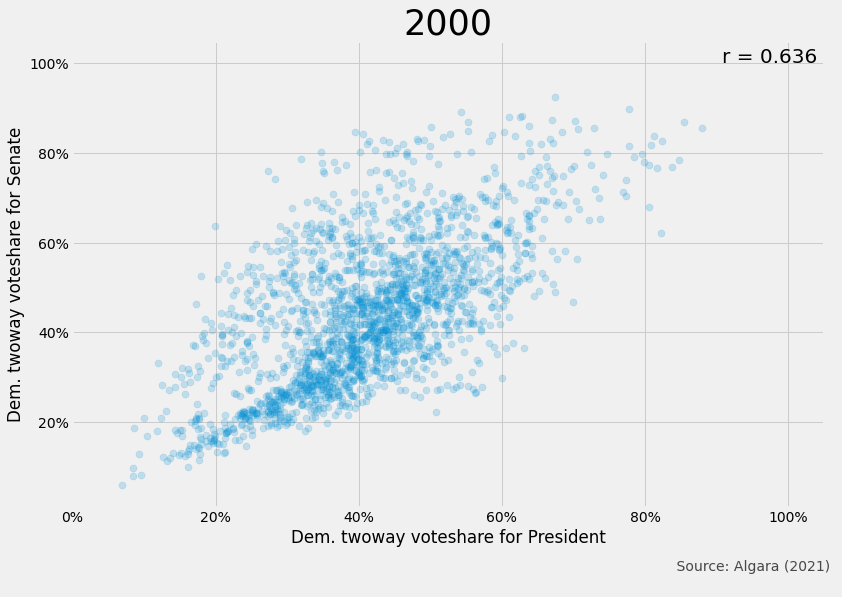

In [7]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plot_corr_scatter(2000)

#### Build gif

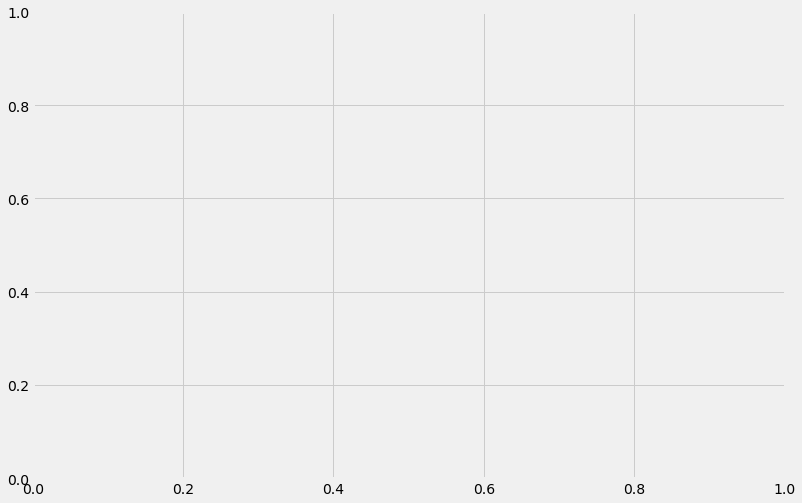

In [8]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ani = animation.FuncAnimation(fig, plot_corr_scatter, frames=np.arange(1960, 2024, 4), interval=1500)
# ani.save('img/pres_sen_corr_over_time.gif', writer='pillow')

---

#### Build bokeh exploration tool

In [9]:
election_year = 2020
merge_df_2020 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2020 = merge_df_2020[(merge_df_2020.dem_twoway_sen < 1) & (merge_df_2020.dem_twoway_sen > 0)]
merge_df_2020['dem_twoway_pres_display'] = merge_df_2020.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2020['dem_twoway_sen_display'] = merge_df_2020.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2020.shape)
merge_df_2020.head()

(2384, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2020.0,01001,AUTAUGA,AL,0.274423,0.299198,27.4%,29.9%
1,2020.0,01003,BALDWIN,AL,0.227317,0.265063,22.7%,26.5%
2,2020.0,01005,BARBOUR,AL,0.461391,0.479561,46.1%,48.0%
3,2020.0,01007,BIBB,AL,0.208811,0.234630,20.9%,23.5%
4,2020.0,01009,BLOUNT,AL,0.096523,0.119841,9.7%,12.0%


In [10]:
election_year = 2016
merge_df_2016 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2016 = merge_df_2016[(merge_df_2016.dem_twoway_sen < 1) & (merge_df_2016.dem_twoway_sen > 0)]
merge_df_2016['dem_twoway_pres_display'] = merge_df_2016.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2016['dem_twoway_sen_display'] = merge_df_2016.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2016.shape)
merge_df_2016.head()

(2000, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2016.0,01001,AUTAUGA,AL,0.246225,0.257871,24.6%,25.8%
1,2016.0,01003,BALDWIN,AL,0.202078,0.205493,20.2%,20.5%
2,2016.0,01005,BARBOUR,AL,0.471768,0.467737,47.2%,46.8%
3,2016.0,01007,BIBB,AL,0.217603,0.239476,21.8%,23.9%
4,2016.0,01009,BLOUNT,AL,0.086188,0.118494,8.6%,11.8%


In [11]:
election_year = 2012
merge_df_2012 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2012 = merge_df_2012[(merge_df_2012.dem_twoway_sen < 1) & (merge_df_2012.dem_twoway_sen > 0)]
merge_df_2012['dem_twoway_pres_display'] = merge_df_2012.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2012['dem_twoway_sen_display'] = merge_df_2012.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2012.shape)
merge_df_2012.head()

(1878, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2012.0,04001,APACHE,AZ,0.675158,0.681790,67.5%,68.2%
1,2012.0,04003,COCHISE,AZ,0.386029,0.429566,38.6%,43.0%
2,2012.0,04005,COCONINO,AZ,0.579611,0.597686,58.0%,59.8%
3,2012.0,04007,GILA,AZ,0.363890,0.403880,36.4%,40.4%
4,2012.0,04009,GRAHAM,AZ,0.308858,0.339027,30.9%,33.9%


In [12]:
election_year = 2008
merge_df_2008 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2008 = merge_df_2008[(merge_df_2008.dem_twoway_sen < 1) & (merge_df_2008.dem_twoway_sen > 0)]
merge_df_2008['dem_twoway_pres_display'] = merge_df_2008.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2008['dem_twoway_sen_display'] = merge_df_2008.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2008.shape)
merge_df_2008.head()

(2318, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2008.0,01001,AUTAUGA,AL,0.259321,0.228576,25.9%,22.9%
1,2008.0,01003,BALDWIN,AL,0.240351,0.205338,24.0%,20.5%
2,2008.0,01005,BARBOUR,AL,0.492692,0.484965,49.3%,48.5%
3,2008.0,01007,BIBB,AL,0.268543,0.265363,26.9%,26.5%
4,2008.0,01009,BLOUNT,AL,0.147296,0.149220,14.7%,14.9%


In [13]:
election_year = 2004
merge_df_2004 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2004 = merge_df_2004[(merge_df_2004.dem_twoway_sen < 1) & (merge_df_2004.dem_twoway_sen > 0)]
merge_df_2004['dem_twoway_pres_display'] = merge_df_2004.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2004['dem_twoway_sen_display'] = merge_df_2004.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2004.shape)
merge_df_2004.head()

(2014, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2004.0,01001,AUTAUGA,AL,0.238448,0.201138,23.8%,20.1%
1,2004.0,01003,BALDWIN,AL,0.227490,0.198627,22.7%,19.9%
2,2004.0,01005,BARBOUR,AL,0.450284,0.386831,45.0%,38.7%
3,2004.0,01007,BIBB,AL,0.276286,0.240811,27.6%,24.1%
4,2004.0,01009,BLOUNT,AL,0.184675,0.155898,18.5%,15.6%


In [14]:
election_year = 2000
merge_df_2000 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2000 = merge_df_2000[(merge_df_2000.dem_twoway_sen < 1) & (merge_df_2000.dem_twoway_sen > 0)]
merge_df_2000['dem_twoway_pres_display'] = merge_df_2000.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2000['dem_twoway_sen_display'] = merge_df_2000.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2000.shape)
merge_df_2000.head()

(2023, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
15,2000.0,06001,ALAMEDA,CA,0.741914,0.749888,74.2%,75.0%
16,2000.0,06003,ALPINE,CA,0.485348,0.511111,48.5%,51.1%
17,2000.0,06005,AMADOR,CA,0.402535,0.470684,40.3%,47.1%
18,2000.0,06007,BUTTE,CA,0.407400,0.466857,40.7%,46.7%
19,2000.0,06009,CALAVERAS,CA,0.400916,0.466326,40.1%,46.6%


In [15]:
color_mapper = LinearColorMapper(palette=tuple(reversed(bokeh.palettes.RdBu11)), 
                                 low=0,
                                 high=1)

p = figure(title='County-Level President vs. Senate Dem. Voteshare',
           x_axis_label='Dem. twoway voteshare for President',
           y_axis_label='Dem. twoway voteshare for Senate',
           width=800,
           height=500)
r2020 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2020,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2020'
              )
r2016 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2016,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2016',
               visible=False
              )
r2012 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2012,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2012',
               visible=False
              )
r2008 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2008,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2008',
               visible=False
              )
r2004 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2004,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2004',
               visible=False
              )
r2000 = p.scatter('dem_twoway_pres', 'dem_twoway_sen', source=merge_df_2000,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='2000',
               visible=False
              )

p.add_tools(HoverTool(
    tooltips=[
        ('Election Year', '@election_year'),
        ('County', '@county_name'),
        ('State', '@state'),
        ('Dem. Twoway for President', '@dem_twoway_pres_display'),
        ('Dem. Twoway for Senate', '@dem_twoway_sen_display')
    ]))

p.legend.click_policy="hide"
p.legend.location = "bottom_right"

# bokeh.plotting.output_file('index.html')
show(p)